<a href="https://colab.research.google.com/github/DeodatoBastos/Simple_Pendulum_Simulation/blob/main/ImersaoDados_4_Pesquisa_de_Imoveis_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

## Visão geral do *dataset*

In [206]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [207]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8057,Rua João Batista Leme da Silva,Vila Madalena,São Paulo,195,3,2,2,R$ 1.045.000
6901,Rua Florânia,Vila Nair,São Paulo,148,3,2,2,R$ 645.000
2443,"Avenida Piassanguaba, 1009",Planalto Paulista,São Paulo,182,3,1,2,R$ 980.000
3580,Rua Croata,Vila Ipojuca,São Paulo,146,2,2,1,R$ 1.190.000
1921,Rua do Horto,Horto Florestal,São Paulo,389,3,5,8,R$ 1.500.000
2859,NaN,Pinheiros,São Paulo,1022,4,14,8,R$ 85.000\n /Mês
9840,Rua Agostinho Gomes,Ipiranga,São Paulo,150,2,3,2,R$ 930.000
5798,Rua Polônia,Jardim Europa,São Paulo,491,3,4,2,R$ 3.200.000
891,Rua Evezu,Vila Madalena,São Paulo,248,3,3,4,R$ 1.900.000
3523,Rua Livreiro Saraiva,Pacaembu,São Paulo,372,3,6,5,R$ 2.600.000


In [208]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [210]:
imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

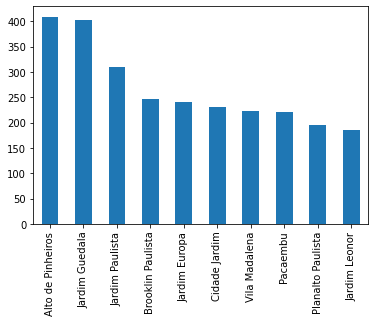

In [211]:
n_imoveis_bairro = dados["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()

## Metragem de cada bairro

In [212]:
metragem_por_bairro = dados.groupby(by='Bairro')['Metragem']
media_metragem = metragem_por_bairro.mean().sort_values(ascending=False)
media_metragem

Bairro
Sítio Represa                         37000.000000
Vila Castelo                           2850.000000
Jardim Guedala                         2486.640199
Jardim das Camélias                    1700.000000
Chácara Flora                          1260.727273
                                          ...     
Cidade Antônio Estevão de Carvalho       57.500000
Jardim Nova Germania                     57.000000
Jardim Benfica                           48.000000
Vila Leonor                              46.000000
Vila Guaca                               10.000000
Name: Metragem, Length: 701, dtype: float64

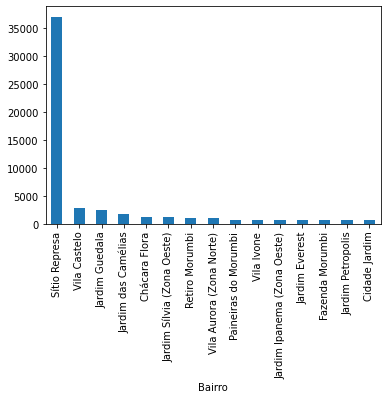

In [213]:
media_metragem.head(15).plot.bar()

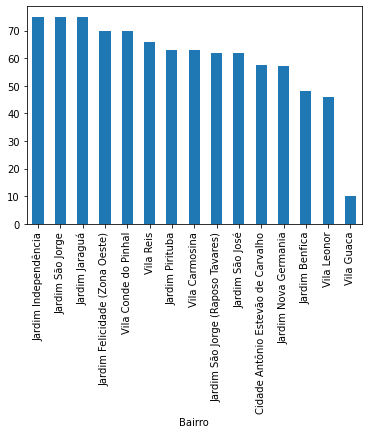

In [214]:
media_metragem.tail(15).plot.bar()

## Filtros por bairros

In [215]:
bairro_cidade_jardim = dados.loc[lambda df: df['Bairro'] == 'Cidade Jardim', :]
bairro_cidade_jardim.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1754,NaN,Cidade Jardim,São Paulo,605,5,6,6,R$ 10.000.000
4927,Rua das Tuias,Cidade Jardim,São Paulo,746,5,5,3,R$ 4.600.000
3623,NaN,Cidade Jardim,São Paulo,685,5,5,4,R$ 4.500.000
646,NaN,Cidade Jardim,São Paulo,650,4,6,4,R$ 7.000.000
8029,Avenida das Magnólias,Cidade Jardim,São Paulo,855,4,4,10,R$ 11.000.000
6439,NaN,Cidade Jardim,São Paulo,700,4,4,5,R$ 20.000\n /Mês
4068,Praça Renzo Pagliari,Cidade Jardim,São Paulo,1012,4,6,10,R$ 10.500.000
2603,Avenida Amarilis,Cidade Jardim,São Paulo,661,4,7,8,R$ 5.900.000
7309,NaN,Cidade Jardim,São Paulo,414,4,1,4,R$ 4.500.000
2281,Rua Muribeca,Cidade Jardim,São Paulo,420,4,5,3,R$ 3.000.000


In [216]:
bairro_pacaembu = dados[dados['Bairro'] == 'Pacaembu']
bairro_pacaembu.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
558,Rua Heitor de Morais,Pacaembu,São Paulo,500,4,4,10,R$ 2.300.000
4077,Rua Bragança,Pacaembu,São Paulo,500,3,4,8,R$ 2.420.000
2979,Rua Ubatuba,Pacaembu,São Paulo,425,4,5,5,R$ 5.500.000
1630,"Rua Teodoro Ramos, 75",Pacaembu,São Paulo,268,3,6,2,R$ 15.000\n /Mês
1715,Rua Traipu,Pacaembu,São Paulo,280,4,2,2,R$ 2.200.000
3931,Rua João Florêncio,Pacaembu,São Paulo,300,3,2,7,R$ 2.200.000
1598,Rua Desembargador Paulo Passaláqua,Pacaembu,São Paulo,826,7,7,30,R$ 8.000.000
2425,NaN,Pacaembu,São Paulo,525,6,6,5,R$ 2.500.000
989,Rua Traipu,Pacaembu,São Paulo,260,4,3,2,R$ 2.200.000
1947,NaN,Pacaembu,São Paulo,1400,3,7,10,R$ 11.000.000


## Análises sobre alguns dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16ef458a10>,
      dtype=object)

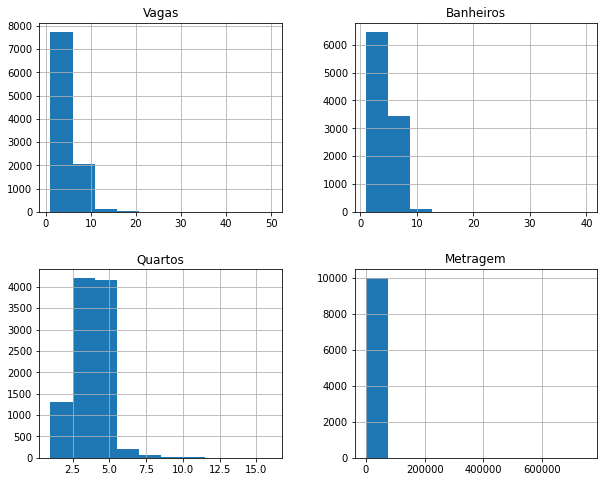

In [217]:
dados[['Vagas', 'Banheiros', 'Quartos', 'Metragem']].hist(figsize=(10, 8))

### Conclusões

A partir dos histogramas plotados, pode-se ver que a há uma concentração muito grande em pequenos valores nas colunas *Vagas*, *Banheiros*, *Quartos*.

Na coluna *Metragem* há algum dado muito destoante, visto que no histograma há valores bem altos, porém quase não há pontos com altos valores. Isso pode significar que esses pontos destoantes podem ser erros na hora de criar o *dadosset*.

Algo semelhante é visto nas outras colunas, contudo o fenômeno não é tão acentuado quanto na *Metragem*. Logo, retirar esses dados pode ser uma boa ação para evitar futuros problemas com o modelo a ser criado.

## Outros dados relevantes

In [218]:
dt_filter = dados[['Quartos', 'Banheiros', 'Vagas']]
dt_filter.head()

,Quartos,Banheiros,Vagas
0,4,8,6
1,4,4,4
2,4,3,2
3,3,2,4
4,3,2,2


In [219]:
mean_list = dt_filter.mean().to_list()
median_list = dt_filter.median().to_list()
min_list = dt_filter.min().to_list()
max_list = dt_filter.max().to_list()
std_list = dt_filter.std().to_list()

In [223]:
dict_dados = {'Media': mean_list, 'Mediana': median_list,
             'Minimo': min_list, 'Maximo': max_list,
             'Desvio_Padrao': std_list}
statistics = pd.DataFrame(data=dict_dados, index=['Quartos',  'Banheiros', 'Vagas'])
statistics

,Media,Mediana,Minimo,Maximo,Desvio_Padrao
Quartos,3.483114,3.0,1,16,1.064200
Banheiros,3.879097,4.0,1,40,1.988467
Vagas,4.097222,4.0,1,50,2.824014


## Bairros sem nome de rua

In [224]:
ruas_sem_nome = dados[dados['Rua'].isna()]
ruas_sem_nome.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
5896,NaN,Jardim Paulista,São Paulo,420,3,5,6,R$ 6.000.000
6928,NaN,Brooklin,São Paulo,350,4,2,5,R$ 18.000\n /Mês
1620,NaN,Santo Amaro,São Paulo,551,4,5,6,R$ 4.950.000
9720,NaN,Engenheiro Goulart,São Paulo,155,3,3,2,R$ 290.000
6066,NaN,Vila Lúcia,São Paulo,345,3,1,5,R$ 1.810.000
9234,NaN,Alto de Pinheiros,São Paulo,670,4,5,6,R$ 2.990.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
7998,NaN,Vila Nair,São Paulo,124,2,1,2,R$ 649.990
7910,NaN,Bosque da Saúde,São Paulo,145,3,1,2,R$ 895.000
8000,NaN,Jardim Paulista,São Paulo,650,4,6,8,R$ 48.000\n /Mês


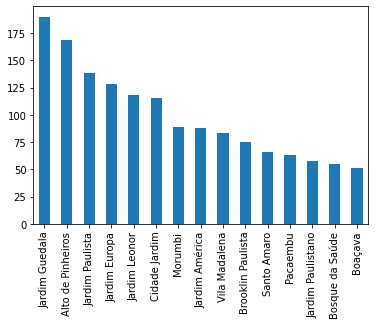

In [234]:
ruas_sem_nome['Bairro'].value_counts().head(15).plot.bar()

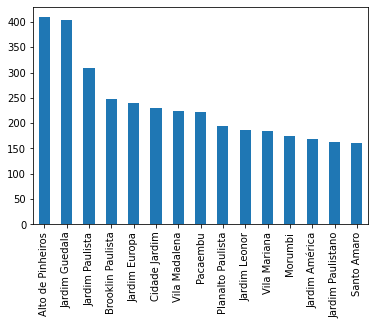

In [236]:
dados['Bairro'].value_counts().head(15).plot.bar()

### Conclusões

Pelos gráficos de barras, acima, vê-se que há uma relação entre a quantidade de ruas em um bairro e a quantidade de ruas sem nome no mesmo bairro. Isso parece fazer sentido, visto que quanto mais ruas há em um bairro, mais fácil ter algum dado perdido, ou que falta, nesse caso o nome da rua.

Contudo, essa relação não é diretamente procional, visto que não segue a mesma ordem que os dados originais, em quantidade de ruas, comparanando com o número de ruas sem nome.